<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Dimensionality%20Reduction/Different_(linear)_dimensionality_reduction_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis (PCA)
Identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data.


## Linear Discriminant Analysis (LDA) 
Tries to identify attributes that account for the most variance between classes.
 In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

## Neighborhood Components Analysis (NCA) 
Neighborhood Component Analysis (NCA) is a machine learning algorithm for metric learning. It learns a linear transformation in a supervised fashion to improve the classification accuracy of a stochastic nearest neighbors rule in the transformed space.

Tries to find a feature space such that a stochastic nearest neighbor algorithm will give the best accuracy. Like LDA, it is a supervised method.
NCA enforces a clustering of the data that is visually meaningful despite the large reduction in dimension.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data

Digits data set contains images of digits from 0 to 9 with approximately 180 samples of each class. Each image is of dimension 8x8 = 64, and is reduced to a two-dimensional data point.

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
X,y=digits.data, digits.target

## Train Test split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

## Scale the data

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

In [88]:
from sklearn.decomposition import PCA
# Number of components to keep. if n_components is not set all components are kept:
pca = PCA()
pca_train = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

### Explained Variance 

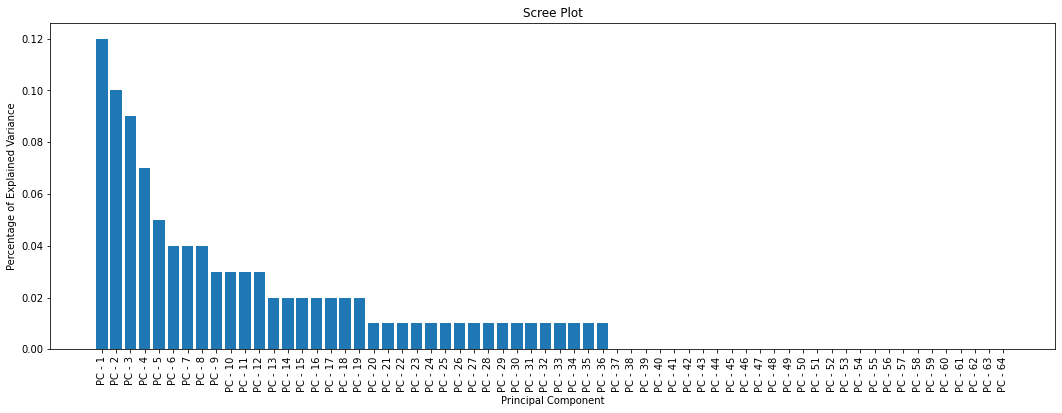

In [89]:
pca_var = np.round(pca.explained_variance_ratio_, decimals=2)
pca_components = ['PC - '+str(i+1) for i in range(len(pca_var))]

plt.figure(figsize=(18,6))
plt.bar(np.arange(len(pca_var)), pca_var)
plt.xticks(np.arange(len(pca_var)), labels=pca_components, rotation=90)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

### PCA plot : 2D projection

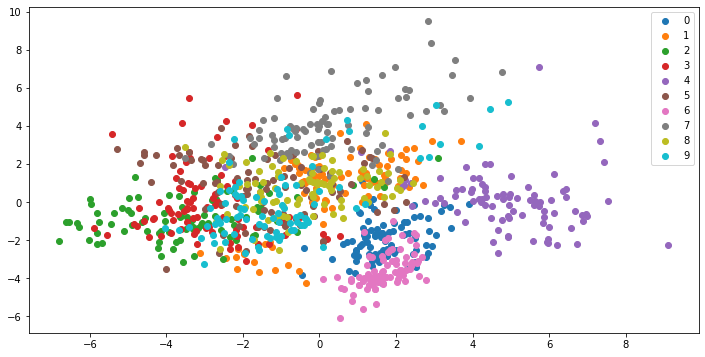

In [90]:
plt.figure(figsize=(12,6))
for i in digits.target_names:
  plt.scatter(pca_train[y_train==i,0], pca_train[y_train==i,1], label=i)
  plt.legend()

plt.show()

### Nearest neighbor classifier 

In [96]:
from sklearn.neighbors import KNeighborsClassifier

# # train and test a nearest neighbor classifier on scaled data
knn_X = KNeighborsClassifier()
knn_X.fit(X_train,y_train)
print('Score on test set',knn_X.score(X_test,y_test))

# # train and test a nearest neighbor classifier on scaled data
knn_X_scaled = KNeighborsClassifier()
knn_X_scaled.fit(X_train_scaled,y_train)
print('Score on test set',knn_X_scaled.score(X_test_scaled,y_test))

# train and test a nearest neighbor classifier on pca transformed data
knn_PCA = KNeighborsClassifier()
knn_PCA.fit(pca_train,y_train)
print('Score on test set',knn_PCA.score(pca_test, y_test))

Score on test set 0.9833147942157954
Score on test set 0.9632925472747497
Score on test set 0.9632925472747497


## LDA

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction. 
# If None, will be set to min(n_classes - 1, n_features). 
# This parameter only affects the transform method.
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled,y_train)
lda_train = lda.transform(X_train_scaled)
lda_test = lda.transform(X_test_scaled)

In [98]:
print('Shape of X_train',X_train.shape,'Shape of LDA transformed X_train',lda_train.shape)
print('Shape of X_train',X_test.shape,'Shape of LDA transformed X_test',lda_test.shape)

Shape of X_train (898, 64) Shape of LDA transformed X_train (898, 9)
Shape of X_train (899, 64) Shape of LDA transformed X_test (899, 9)


### Explained Variance

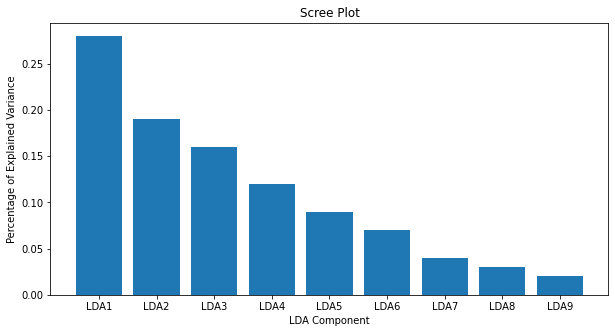

In [99]:
lda_variance = np.round(lda.explained_variance_ratio_, decimals=2)
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(lda_variance)), lda_variance, tick_label=['LDA'+str(i+1) for i in range(9)])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('LDA Component')
plt.title('Scree Plot')
plt.show()

### LDA plot : 2D projection

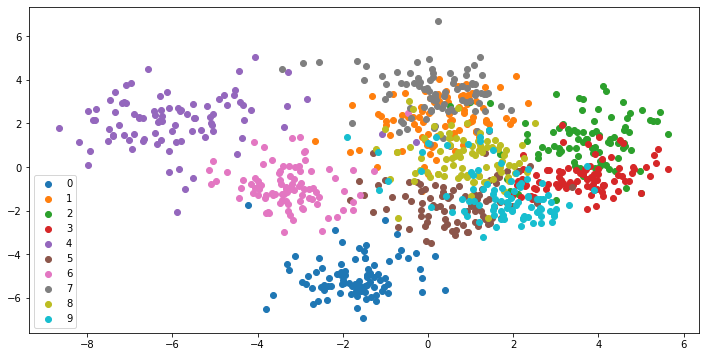

In [100]:
plt.figure(figsize=(12,6))
for i in digits.target_names:
  plt.scatter(lda_train[y_train==i,0], lda_train[y_train==i,1], label=i)
  plt.legend()

plt.show()

### Nearest neighbour classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn_X = KNeighborsClassifier()
knn_X.fit(X_train,y_train)
print('Score on test set',knn_X.score(X_test,y_test))

# train and test a nearest neighbor classifier on scaled data
knn_LDA_scaled = KNeighborsClassifier()
knn_LDA_scaled.fit(X_train_scaled,y_train)
print('Score on test set',knn_LDA_scaled.score(X_test_scaled, y_test))


# train and test a nearest neighbor classifier on pca transformed data
knn_LDA = KNeighborsClassifier()
knn_LDA.fit(lda_train,y_train)
print('Score on test set',knn_LDA.score(lda_test, y_test))

Score on test set 0.9833147942157954
Score on test set 0.9632925472747497
Score on test set 0.9543937708565072


## NCA 
NeighborhoodComponentsAnalysis

In [113]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

# Preferred dimensionality of the projected space.
#  If None it will be set to n_features
nca = NeighborhoodComponentsAnalysis(n_components=28)

# Initialization of the linear transformation.
#  Possible options are 'auto', 'pca', 'lda', 'identity', 'random', and a numpy array of shape (n_features_a, n_features_b)

* 'auto'<br>
Depending on n_components, the most reasonable initialization will be chosen. If n_components <= n_classes we use 'lda', as it uses labels information. If not, but n_components < min(n_features, n_samples), we use 'pca', as it projects data in meaningful directions (those of higher variance). Otherwise, we just use 'identity'.

* 'pca'<br>
n_components principal components of the inputs passed to fit will be used to initialize the transformation. 

* 'lda'<br>
min(n_components, n_classes) most discriminative components of the inputs passed to fit will be used to initialize the transformation. (If n_components > n_classes, the rest of the components will be zero.) 

* 'identity'<br>
If n_components is strictly smaller than the dimensionality of the inputs passed to fit, the identity matrix will be truncated to the first n_components rows.

* 'random'<br>
The initial transformation will be a random array of shape (n_components, n_features). Each value is sampled from the standard normal distribution.

* numpy array<br>
n_features_b must match the dimensionality of the inputs passed to fit and n_features_a must be less than or equal to that. If n_components is not None, n_features_a must match it.<br>

In [114]:
nca.fit(X_train_scaled, y_train)
nca_train = nca.transform(X_train_scaled)
nca_test = nca.transform(X_test_scaled)

print('Shape of X_train',X_train.shape,'Shape of LDA transformed X_train',nca_train.shape)
print('Shape of X_train',X_test.shape,'Shape of LDA transformed X_test',nca_test.shape)

Shape of X_train (898, 64) Shape of LDA transformed X_train (898, 28)
Shape of X_train (899, 64) Shape of LDA transformed X_test (899, 28)


### NCA plot : 2D projection

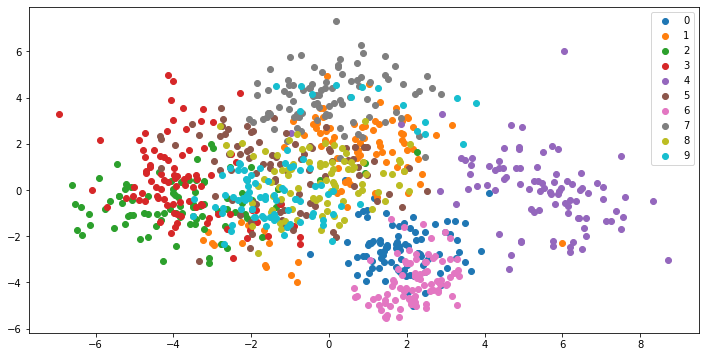

In [115]:
plt.figure(figsize=(12,6))
for i in digits.target_names:
  plt.scatter(nca_train[y_train==i,0], nca_train[y_train==i,1], label=i)
  plt.legend()

plt.show()

### Nearest neighbour classifier

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn_X = KNeighborsClassifier()
knn_X.fit(X_train,y_train)
print('Score on test set',knn_X.score(X_test,y_test))

# train and test a nearest neighbor classifier on scaled data
knn_NCA_scaled = KNeighborsClassifier()
knn_NCA_scaled.fit(X_train_scaled,y_train)
print('Score on test set',knn_NCA_scaled.score(X_test_scaled, y_test))


# train and test a nearest neighbor classifier on pca transformed data
knn_NCA = KNeighborsClassifier()
knn_NCA.fit(nca_train,y_train)
print('Score on test set',knn_NCA.score(nca_test, y_test))

Score on test set 0.9833147942157954
Score on test set 0.9632925472747497
Score on test set 0.9666295884315906
